In [21]:
from matplotlib.patches import Ellipse
import scipy
import numpy as np
from numpy import *
import math
import pylab
import random
from pylab import *
from astropy.coordinates import SkyCoord
from astropy import units as u
import pylab as P
from astropy.io import ascii
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

matplotlib.style.use('ggplot')

sns.set_style('darkgrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

### Now we read in the data

In [22]:
dat4=ascii.read("Leo4_lisp_rod_sdss_ppmxl",data_start=2)
dat5=ascii.read("Leo5_lisp_rod_sdss_ppmxl",data_start=2)
datB=ascii.read("LeoB_lisp_rod_sdss_ppmxl",data_start=2)

### Now we define variables

In [137]:
vhc4 = dat4['Vhel']
verr4 = dat4['Verr']
Radeg4=dat4['RA']
Decdeg4=dat4['DEC']

vhc5 = dat5['Vhel']
verr5 = dat5['Verr']
Radeg5=dat5['RA']
Decdeg5=dat5['DEC']

vhcB = datB['Vhel']
verrB = datB['Verr']
RadegB=datB['RA']
DecdegB=datB['DEC']

In [24]:
np.max(vhc4)

282.7507

In [25]:
np.max(verr4)

89.429

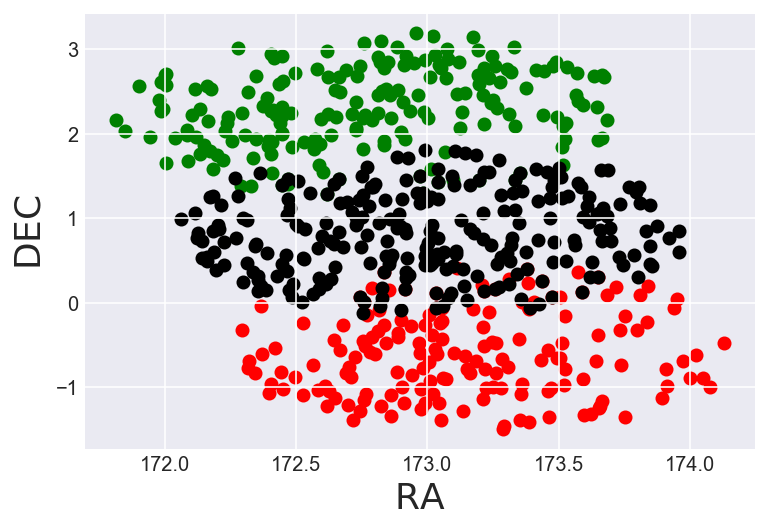

In [26]:
fig0=plt.figure(1)
ax=fig0.add_subplot(111)
ax.plot(Radeg4,Decdeg4,'or',label='Leo4',zorder=-1)
ax.plot(Radeg5,Decdeg5,'og',label='Leo5',zorder=-1)
ax.plot(RadegB,DecdegB,'ok',label='Leo4.5',zorder=-1)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{DEC}$',fontsize=18)
#ax.legend(markerscale=(2), loc=1, numpoints=1)
plt.show()

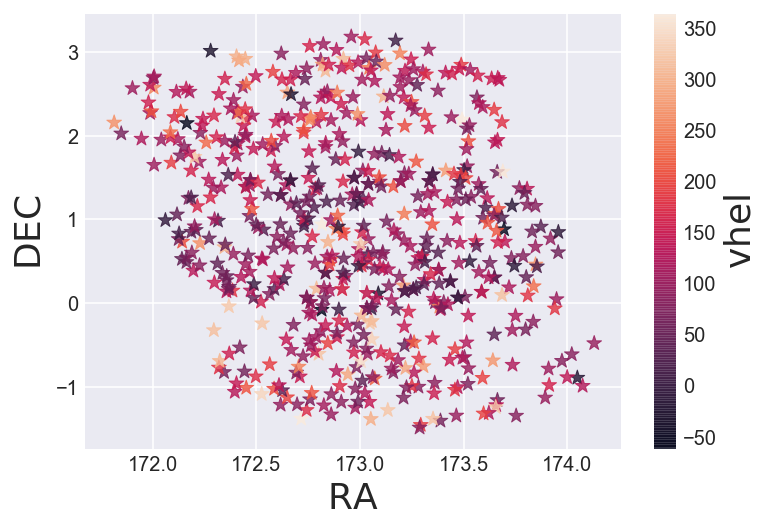

In [47]:
fig2=plt.figure(2)
ax=fig2.add_subplot(111)
plt.scatter(Radeg4,Decdeg4,marker='*',s=60,c=vhc4,label='Leo4', alpha=0.8)
plt.scatter(Radeg5,Decdeg5,marker='*',s=60,c=vhc5,label='Leo5', alpha=0.8)
plt.scatter(RadegB,DecdegB,marker='*',s=60,c=vhcB,label='LeoB', alpha=0.8)
cbar=plt.colorbar()
cbar.set_label(r'$\mathrm{vhel}$',fontsize=18)
ax.set_xlabel(r'$\mathrm{RA}$',fontsize=18)
ax.set_ylabel(r'$\mathrm{DEC}$',fontsize=18)
plt.show()

In [138]:
df4=pd.DataFrame({}, dtype=float)
df4['Ra']=Radeg4
df4['Dec']=Decdeg4
df4['vhc']=vhc4
df4['type']='4'
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,167.0,173.145054,0.435742,172.294416,172.813573,173.101125,173.461591,174.130467
Dec,167.0,-0.594130,0.489895,-1.491850,-0.994701,-0.638332,-0.222024,0.413713
vhc,167.0,89.990328,75.357660,-95.036900,35.143500,70.703700,120.470550,282.750700


In [139]:
df5=pd.DataFrame({}, dtype=float)
df5['Ra']=Radeg5
df5['Dec']=Decdeg5
df5['vhc']=vhc5
df5['type']='5'
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,190.0,172.767223,0.479464,171.813191,172.404663,172.757018,173.131208,173.685525
Dec,190.0,2.291583,0.460383,1.289688,1.949530,2.272166,2.680670,3.184943
vhc,190.0,74.992600,74.214644,-156.468900,31.477000,61.505100,102.387025,325.790900


In [142]:
dfb=pd.DataFrame({}, dtype=float)
dfb['Ra']=RadegB
dfb['Dec']=DecdegB
dfb['vhc']=vhcB
dfb['type']=0
dfb.describe().T

,count,mean,std,min,25%,50%,75%,max
Ra,254.0,172.992299,0.480875,172.060596,172.620685,172.993210,173.354469,173.957379
Dec,254.0,0.813037,0.477672,-0.117703,0.451313,0.780825,1.222173,1.809768
vhc,254.0,94.555554,69.944432,-62.015300,44.958225,82.378900,132.538900,364.103700
type,254.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [143]:
dfall=pd.concat([df4, df5, dfb], ignore_index=True)
dfall.describe().T
group=dfall.groupby(['type'])
group.mean()

,Ra,Dec,vhc
type,,,
0,172.992299,0.813037,94.555554
4,173.145054,-0.594130,89.990328
5,172.767223,2.291583,74.992600


Text(0.5,1,'Velocity boxplot\n')

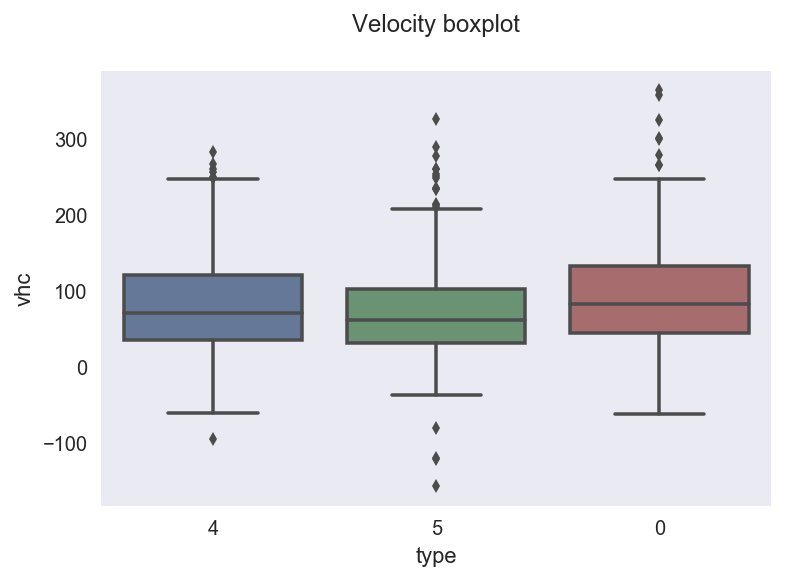

In [144]:
dd=dfall.drop(['Ra','Dec'],1)
ax=sns.boxplot(x="type",y="vhc",data=dd,saturation=0.5) 
ax.set_title('Velocity boxplot\n')

In [132]:
Xk = dfall[[c for c in dfall.columns if not c in ['P1','type']]]
#X = dfall.V.values.astype(float)
yk = dfall.type.values.astype(float)